In [8]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Law of Large Numbers and Central Limit Theorem

## Introduction

This notebook provides an interactive exploration of two fundamental theorems in probability theory: the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)**. These concepts are cornerstones of statistical inference and help us understand how sample statistics behave as sample sizes increase.

### Learning Objectives

By the end of this notebook, you will understand:
- The Law of Large Numbers and its practical implications
- How sample means converge to population means
- The Central Limit Theorem and the distribution of sample means
- The relationship between sample size and statistical accuracy
- How to visualize convergence using Monte Carlo simulations

### Key Concepts

- **Law of Large Numbers**: As sample size increases, sample means converge to the true population mean
- **Central Limit Theorem**: Sample means are approximately normally distributed, regardless of the population distribution
- **Monte Carlo Simulation**: Using random sampling to understand statistical properties

---

## Setting Up the Experiment

We'll use **Bernoulli random variables** for our demonstration. A Bernoulli distribution with parameter $p = 0.5$ represents a fair coin flip where:
- Success (heads) = 1 with probability 0.5  
- Failure (tails) = 0 with probability 0.5

The theoretical mean $\mathbb{E}[X] = p = 0.5$.

### Experimental Design

We'll generate:
- **K = 1000** independent experiments (sample paths)
- Each experiment contains **N = 5000** coin flips
- This allows us to observe both LLN and CLT simultaneously

In [14]:
X1 = dist.Bernoulli(probs=0.5)
X2 = dist.Bernoulli(probs=0.5)

print(X1.sample(), X2.sample())

X = dist.Bernoulli(probs=0.5)
print(X.sample((2,)))

tensor(1.) tensor(0.)
tensor([1., 1.])


## Observing a Single Sample Path

Let's first examine how a single sequence of coin flips converges to the expected value. The running average should approach 0.5 as we add more samples.

In [29]:
X = dist.Bernoulli(probs=0.5)

# Sample N samples (X1, X2, ..., XN) from the Bernoulli distribution
# and store them in a tensor
N = 5000

# Num of samples from population
K = 1000
samples = X.sample((K, N))



## Law of Large Numbers in Action

Now let's visualize the Law of Large Numbers by plotting many sample paths simultaneously. Each gray line represents one experiment, and the red dashed line shows the true expected value.

## Combined Visualization: LLN and CLT

This enhanced visualization shows both theorems simultaneously:

### Left Panel: Law of Large Numbers
- Multiple sample paths showing convergence to the true mean
- Each path represents running averages over time
- Notice how variability decreases as sample size increases

### Right Panel: Central Limit Theorem  
- Distribution of final sample means (from all K=1000 experiments)
- This distribution is approximately normal, even though individual coin flips are Bernoulli
- The center of this distribution is at the true mean (0.5)

## Key Insights and Implications

### Law of Large Numbers
- **Convergence**: Individual sample means approach the true population mean as N → ∞
- **Consistency**: This convergence happens for each individual experiment
- **Practical Meaning**: Larger samples give more accurate estimates

### Central Limit Theorem
- **Normality**: The distribution of sample means becomes normal regardless of the original distribution
- **Universality**: This holds for any distribution with finite mean and variance
- **Statistical Inference**: This is why normal distributions are so important in statistics

### Real-World Applications

1. **Quality Control**: Manufacturing processes use these principles to ensure product quality
2. **Polling**: Election polls rely on CLT to estimate population preferences from samples  
3. **A/B Testing**: Digital experiments use these concepts to make decisions from limited data
4. **Risk Management**: Financial models use LLN to predict long-term outcomes

### Mathematical Formulation

For i.i.d. random variables $X_1, X_2, \ldots, X_n$ with mean $\mu$ and variance $\sigma^2$:

**Law of Large Numbers:**
$$\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{P} \mu \text{ as } n \to \infty$$

**Central Limit Theorem:**
$$\frac{\bar{X}_n - \mu}{\sigma/\sqrt{n}} \xrightarrow{D} N(0,1) \text{ as } n \to \infty$$

In [30]:
samples[0, :]

tensor([0., 0., 1.,  ..., 0., 0., 1.])

In [31]:
samples[1, :]

tensor([1., 1., 0.,  ..., 0., 0., 0.])

(0.0, 1.0)

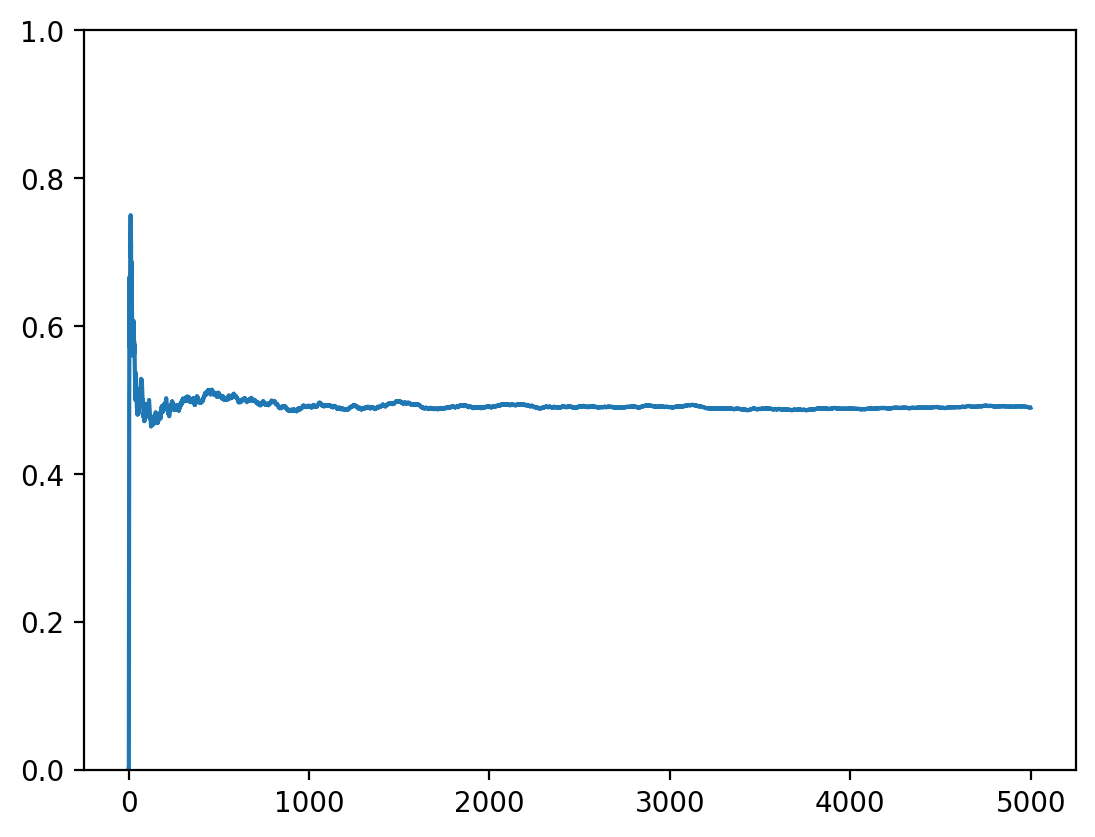

In [32]:

plt.plot(torch.cumsum(samples[0, :], dim=0)/torch.arange(1, N+1).float())
plt.ylim(0, 1)

(0.0, 1.0)

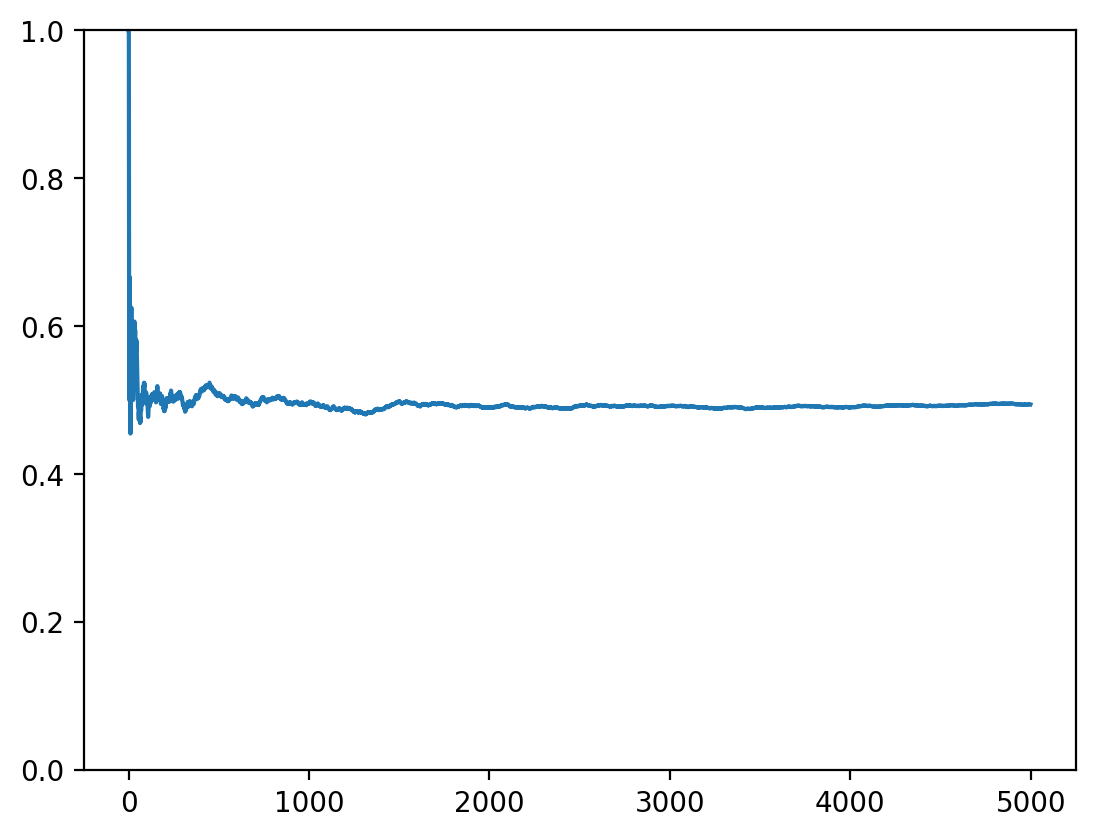

In [33]:
plt.plot(torch.cumsum(samples[1, :], dim=0)/torch.arange(1, N+1).float())
plt.ylim(0, 1)

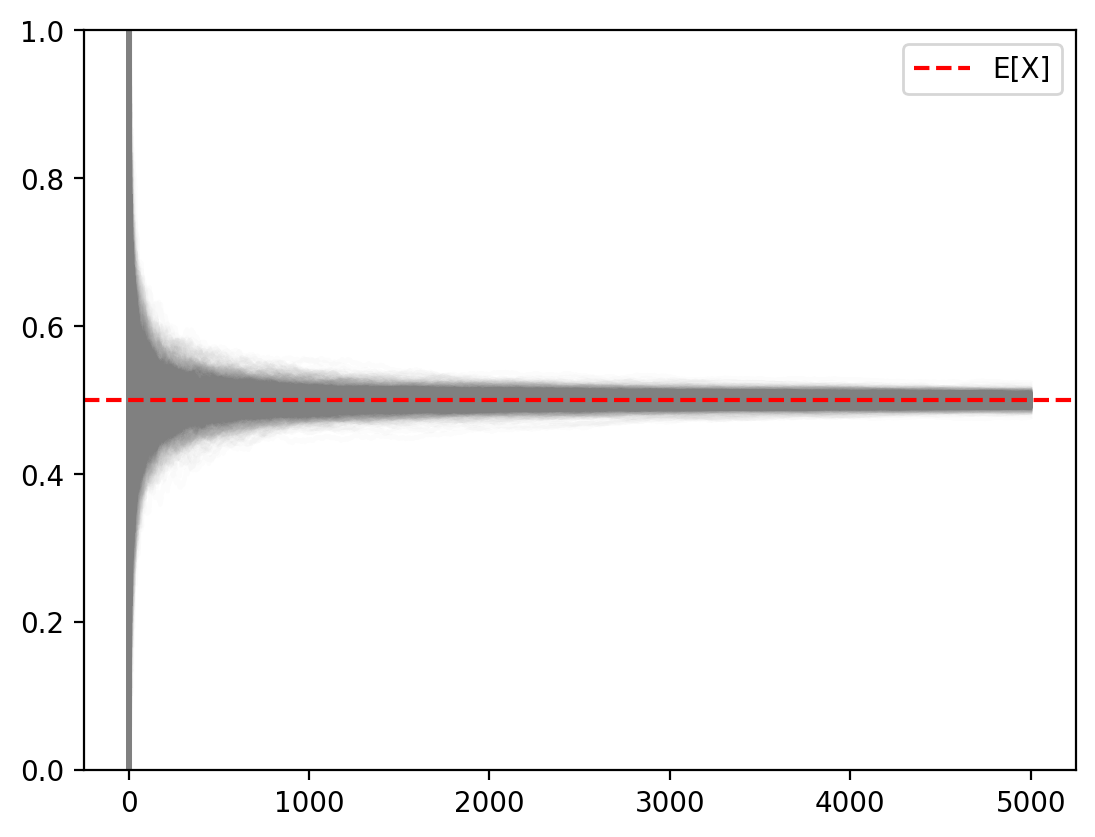

In [34]:
# Plot K draws
running_means = torch.cumsum(samples, dim=1) / torch.arange(1, N+1).float()
for i in range(K):
    plt.plot(running_means[i], alpha=0.02, color='gray')

plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--', label=r'E[X]')
plt.legend()

/var/folders/z8/gpvqr8mn3w9_f38byxhnsk780000gn/T/ipykernel_41382/1333343023.py:37: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_means, ax=ax_clt, color='black', linewidth=2, vertical=True, bw_adjust=4)


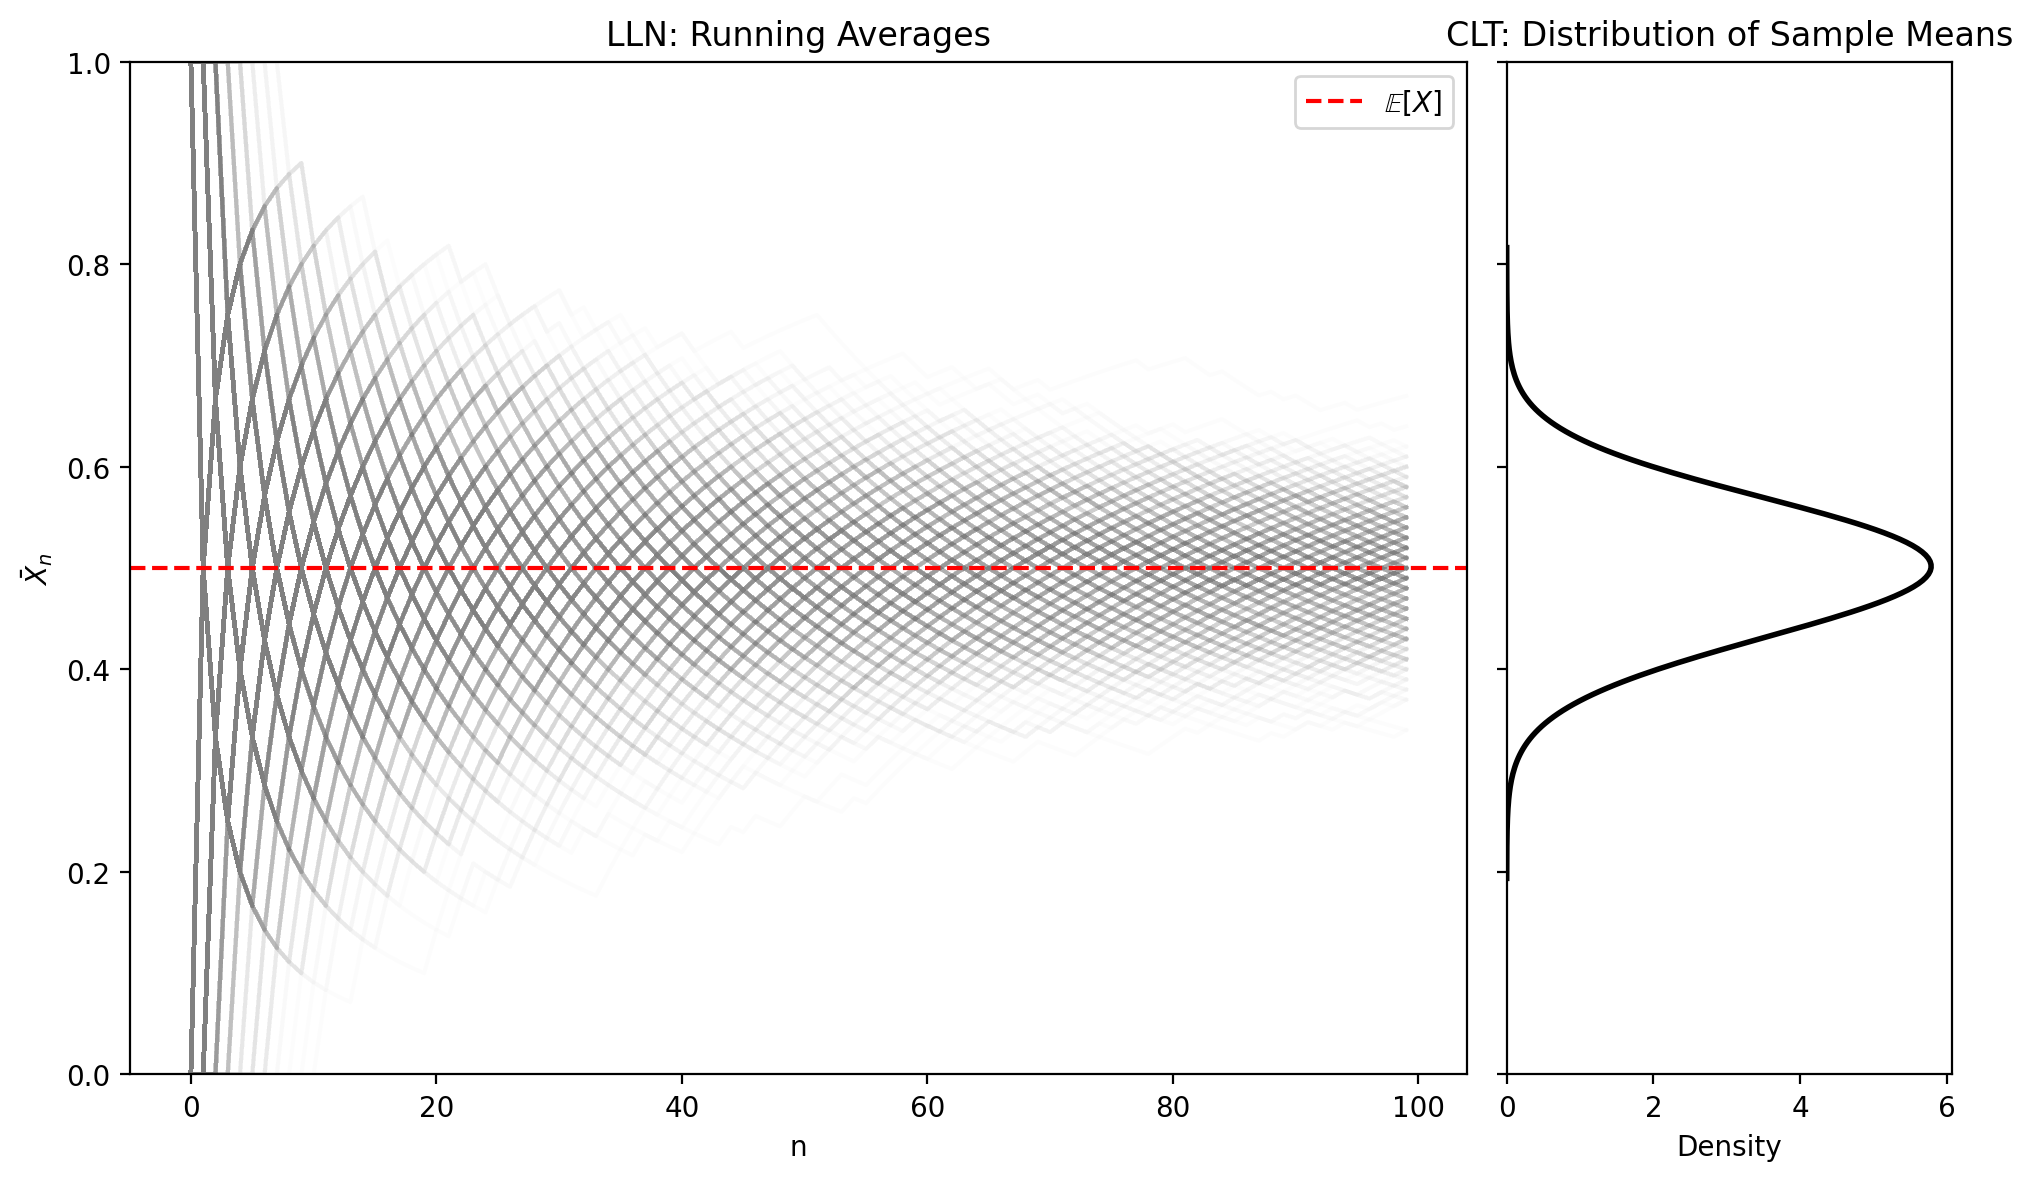

In [35]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
K = 1000  # number of repetitions (sample paths)
N = 100   # samples per repetition
p = 0.5   # Bernoulli parameter

# Generate samples
X = torch.distributions.Bernoulli(probs=p)
samples = X.sample((K, N))

# Running averages (LLN)
running_means = torch.cumsum(samples, dim=1) / torch.arange(1, N + 1).float()

# Final sample means (for CLT)
final_means = running_means[:, -1].numpy()

# --- Plotting ---
fig, (ax_lln, ax_clt) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1]}, sharey=True)

# LLN plot (running means)
for i in range(K):
    ax_lln.plot(running_means[i], color='gray', alpha=0.02)

ax_lln.axhline(p, color='red', linestyle='--', label=r'$\mathbb{E}[X]$')
ax_lln.set_xlabel("n")
ax_lln.set_ylabel(r"$\bar{X}_n$")
ax_lln.set_title("LLN: Running Averages")
ax_lln.set_ylim(0, 1)
ax_lln.legend()

# CLT plot (rotated histogram + KDE)
#sns.histplot(final_means, bins=30, stat='density', orientation='horizontal',
#             ax=ax_clt, color='skyblue', edgecolor='white', alpha=0.6)
sns.kdeplot(final_means, ax=ax_clt, color='black', linewidth=2, vertical=True, bw_adjust=4)

ax_clt.set_xlabel("Density")
ax_clt.set_ylabel("")  # shared y-axis
ax_clt.set_title("CLT: Distribution of Sample Means")
ax_clt.set_ylim(0, 1)
ax_clt.grid(False)

plt.tight_layout()
